# [Deception Detection in Speech: An SVM-Based Classification System]

# 2 Problem formulation

本研究旨在解决如何根据音频文件判别其所讲述故事的真伪问题。核心思路是通过音频处理库提取音频信号中的模式，训练机器学习模型，优化参数，并最终输出分类结果。这一过程涵盖了语音信号的处理与分析，通过从音频中提取潜在的模式以推断其可信度。该任务不仅复杂，而且具有高度的细微性和挑战性。

# 3 Methodology

**训练任务**：首先，将数据集按一定比例分割为训练集和验证集。在训练阶段，通过从训练集中的音频文件提取特征（如MFCCs、色度、梅尔频谱图等），并将这些特征与音频对应的“真”或“假”标签一起用于训练模型。

**验证任务**：在验证阶段，使用测试集对训练好的模型进行评估，以验证其泛化能力并确保其在未见数据上的表现。

**模型表现评估**：模型的表现主要通过准确度来评估，同时也会分析训练集与测试集之间的表现差异，以判断是否存在过拟合现象。除了准确度外，还将关注模型的分类报告，特别是F1分数等评价指标。此外，混淆矩阵也将作为重要工具，帮助分析模型的错误分类模式，进一步揭示模型的优缺点。

任何其他辅助任务（例如特征选择、降维等）将在后续部分进行详细说明。

# 4 Implemented ML prediction pipelines

预测流程包括如下阶段：

## 转换阶段
在这一阶段，从音频文件中提取特征并进行必要的预处理。  
**输入**：音频文件（`.wav` 格式）及其对应的属性文件（`.csv` 格式）。  
**输出**：提取的特征矩阵及目标标签。

## 模型阶段
训练机器学习模型，主要包括随机森林和支持向量机（SVM）。  
**输入**：转换阶段输出的特征矩阵和目标标签。  
**输出**：训练后的分类器模型及其性能指标。

## 集成阶段
该阶段尚未实现，但未来可以考虑采用多模型融合方法以提高分类性能。

## 4.1 Transformation stage

**输入**：音频文件（`.wav` 格式）及其对应的属性文件（`.csv` 格式）。  
**输出**：提取的特征矩阵及目标标签。

具体转换过程如下：  
1. 直接处理 `.wav` 文件显然不可行，因此我们选择使用 `librosa` 库提取音频特征，如MFCC、色度特征、梅尔频谱图和光谱对比度等。这些特征在音频分类任务中广泛使用，是将 `.wav` 文件转换为数值矩阵的一种有效方法。  
2. 将提取的特征存储为 `.csv` 文件，以便后续的处理和分析。  
3. 由于数据集样本较少，为了减少过拟合的风险，进一步对特征进行处理：  
   - 使用 `StandardScaler` 对特征进行标准化，确保各特征具有相同的量纲。  
   - 使用主成分分析（PCA）保留 95% 的方差，从而提高计算效率并减少特征维度。

## 4.2 Model stage

**输入**：转换阶段输出的特征矩阵及目标标签。  
**输出**：训练后的分类器模型及其性能指标。

在此阶段，我们构建了以下模型：  
1. **随机森林分类器**：用于评估特征的重要性，并在此基础上进行特征选择。  
2. **支持向量机（SVM）**：通过网格搜索优化超参数，并利用最佳模型进行预测。

选择这两种模型的原因如下：  
- **随机森林**能够有效地评估特征的重要性，从而减少噪声特征带来的过拟合风险。  
- **支持向量机**在高维数据和小样本情况下通常表现出良好的性能，因此适用于本研究中的任务。

## 4.3 Ensemble stage

目前尚未实施集成方法。在测试过程中，尝试了其他分类器，如K近邻（KNN）和决策树，但它们的准确率较低，并且容易出现过拟合现象。相关的分类报告将在第六部分中详细讨论。

# 5 Dataset

**数据集描述**  
该数据集基于 **MLEnd 欺骗数据集**，包含音频文件及其对应的故事类型标签。初步数据集通过特征提取生成，每行数据表示一个音频样本的特征向量及其标签。

**数据集划分**  
1. **训练集（70%）**：用于模型训练。  
2. **测试集（30%）**：用于评估模型性能。

**构建方法**  
- 采用 `train_test_split` 函数随机划分训练集和测试集，确保样本独立且满足 IID（独立同分布）假设。同时，设置 `random_state=42`，以保证每次划分结果一致。

**局限性**  
1. 数据集的规模可能不足以充分训练复杂的模型。  
2. 特征提取方案可能未能有效捕捉某些关键信息，例如音频中的语义内容。

接下来，本文将引入必要的库，定义路径，并导入数据集。

In [45]:
import pandas as pd

# Paths and constants
AUDIO_FOLDER = "D:\个人\大三上\机器学习\mini-proj\code\CBU0521DD_stories"
ATTRIBUTE_FILE = "D:\个人\大三上\机器学习\mini-proj\code\CBU0521DD_stories_attributes.csv"
FEATURES_FILE = r"D:\个人\大三上\机器学习\mini-proj\code\features.csv"

# Read attributes
attributes_df = pd.read_csv(ATTRIBUTE_FILE)

现在，我们将绘制真假故事标签的分布热力图，以检查样本是否均衡。

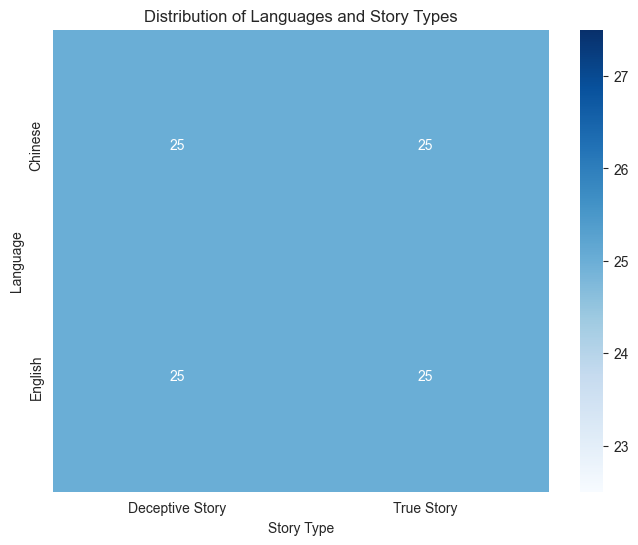

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for heatmap
pivot_table = pd.crosstab(attributes_df['Language'], attributes_df['Story_type'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
plt.title("Distribution of Languages and Story Types")
plt.xlabel("Story Type")
plt.ylabel("Language")
plt.show()

显然，故事的真假标签和语言的分布均较为平衡，因此我们无需担心样本不均衡的问题。


# 6 Experiments and results

## 提取音频特征  
在本研究中，定义了一个提取音频特征的函数 `extract_features`。该函数用于从指定路径的音频文件中提取多种音频特征，具体工作流程如下：

### 1. 加载音频文件
函数首先使用 `librosa.load(file_path, ...)` 加载音频文件，加载参数如下：  
- `sr=None`：保留音频文件的原始采样率。  
- `mono=True`：将音频转换为单声道。  
- `duration=220`：由于最长音频时长约为200秒，因此此处仅加载音频的前220秒。  

加载完成后，返回音频信号 `y` 和采样率 `sr`。

### 2. 提取音频特征
从音频信号 `y` 中提取以下特征：

- **MFCC（梅尔频率倒谱系数）**：描述音频的短时功率谱，广泛用于语音和音频处理。  
- **色度特征（Chroma）**：表示音频的12个音高类（如C、C#、D等），常用于音乐分析和音调识别。  
- **梅尔频谱（Mel Spectrogram）**：反映音频信号的梅尔尺度频率特征，符合人耳的听觉感知模型。  
- **频谱对比度（Spectral Contrast）**：衡量频谱中峰谷的对比度，常用于音色分析。  
- **频谱质心（Spectral Centroid）**：表示频谱的亮度，常用于音频的“清晰度”分析。  
- **频谱带宽（Spectral Bandwidth）**：表示音频频谱的宽度，有助于区分尖锐感和清晰度。  
- **频谱平坦度（Spectral Flatness）**：衡量频谱的平坦程度，用于区分噪声和有音调的声音。  
- **均方根能量（RMS Energy）**：反映音频信号的能量或响度。  
- **过零率（Zero-Crossing Rate, ZCR）**：计算信号的过零率，常用于检测音频中的噪声或语音特征。  

### 3. 合并特征
提取的特征（如MFCC、色度、梅尔频谱等）会被合并成一个长的特征向量，作为机器学习模型的输入。

### 4. 错误处理
在特征提取过程中，如果发生错误（如文件加载失败或特征计算失败），函数会捕获异常并打印错误信息，随后返回 `None`。

通过该函数，能够从音频文件中提取多个维度的音频特征，为后续的机器学习模型提供输入。

In [47]:
import numpy as np
import librosa


# Feature extraction function
def extract_features(file_path):
    try:
        # Load audio
        y, sr = librosa.load(file_path, sr=None, mono=True, duration=220)  # Load up to 220 s

        # Extract features
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
        spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr).T, axis=0)
        spectral_centroid = np.array([np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))])
        spectral_bandwidth = np.array([np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))])
        spectral_flatness = np.array([np.mean(librosa.feature.spectral_flatness(y=y))])
        rms = np.array([np.mean(librosa.feature.rms(y=y))])
        zcr = np.array([np.mean(librosa.feature.zero_crossing_rate(y=y))])

        # Combine features
        return np.concatenate((mfccs, chroma, mel, spectral_contrast,
                               spectral_centroid, spectral_bandwidth,
                               spectral_flatness, rms, zcr))
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

接下来，我们将从包含音频文件信息的 CSV 文件中读取数据，提取每个音频文件的特征，并将这些特征与标签一起保存到一个新的 CSV 文件中。

### 5. 读取音频文件信息  
首先，使用 `pd.read_csv(ATTRIBUTE_FILE)` 读取存储音频文件信息的 CSV 文件。该文件包含音频文件名（`filename`）以及每个音频文件对应的标签（如故事类型 `Story_type`）。读取后，数据存储在 pandas 的 DataFrame 中，每一行代表一个音频文件及其相关属性。

### 6. 特征提取  
然后，初始化两个空列表 `features` 和 `labels`，分别用于存储音频特征和标签。接着，遍历 `attributes_df` 中的每一行数据：  

- 从每行中提取音频文件名（`filename`）和对应的标签（`Story_type`）。  
- 将文件夹路径与音频文件名结合，得到音频文件的完整路径。  
- 调用 `extract_features(file_path)` 函数，从指定路径的音频文件中提取特征。提取成功后，将特征添加到 `features` 列表中，将标签添加到 `labels` 列表中。  

在完成所有音频文件的特征提取后，打印 `Features extracted.`，表示特征提取过程已完成。

### 7. 转换为 DataFrame 并保存  
最后，将提取的特征数据（存储在 `features` 列表中）转换为 pandas DataFrame 格式，并将标签（存储在 `labels` 列表中）作为一个新列添加到 DataFrame 中。最终，使用 `to_csv(FEATURES_FILE, index=False)` 将这个 DataFrame 保存为一个新的 CSV 文件，以便后续模型训练使用。

In [48]:
import os

# Read attributes
attributes_df = pd.read_csv(ATTRIBUTE_FILE)

# Feature extraction
features, labels = [], []
for index, row in attributes_df.iterrows():
    file_name = row['filename']
    story_type = row['Story_type']
    file_path = os.path.join(AUDIO_FOLDER, file_name)

    # Extract features
    feature = extract_features(file_path)
    if feature is not None:
        features.append(feature)
        labels.append(story_type)

print('Features extracted.')

# Convert to DataFrame and save
features_df = pd.DataFrame(features)
features_df['label'] = labels
features_df.to_csv(FEATURES_FILE, index=False)

Features extracted.


## 基于随机森林的特征选择

接下来，我们将加载上一步中保存的 CSV 数据集，训练一个随机森林分类器，评估特征的重要性，选择重要特征，并将选中的特征及其对应的标签保存到一个新的 CSV 文件中。  

在训练过程中，我发现如果直接使用 `features.csv` 进行模型训练，容易导致过拟合。这可能是由于样本量较小，以及特征中包含太多无关的噪声特征。因此，在将特征输入支持向量机（SVM）模型之前，我决定使用随机森林进行特征选择，以评估各特征的重要性。

### 1. 加载数据  
首先，通过读取 `features.csv` 文件来加载数据。该文件包含特征向量和对应的标签。使用 `pd.read_csv` 函数将文件加载为 pandas 的 DataFrame 格式。

### 2. 分离特征和目标  
加载数据后，代码将数据分为特征（X）和目标（y）。特征是数据中的所有列，除了最后一列；目标是 DataFrame 中的最后一列。通过使用 `iloc`，`X` 包含所有特征列，`y` 包含目标列。

### 3. 初始化随机森林分类器并训练模型  
接下来，初始化一个随机森林分类器，并使用特征数据（X）和目标数据（y）进行训练。随机森林的树木数量设置为 100（`n_estimators=100`），并通过设置 `random_state=42` 来保证实验结果的可重复性。然后，使用 `fit` 方法将模型训练在特征数据和目标数据上。

### 4. 打印特征重要性  
训练完成后，代码通过访问随机森林模型的 `feature_importances_` 属性来评估每个特征的重要性。`importances` 变量存储了每个特征的重要性值，而 `feature_names` 则包含了特征列的名称。接着，代码将特征按重要性排序，并打印出最重要的前 10 个特征。

### 5. 基于特征重要性选择特征  
接下来，代码通过 `SelectFromModel` 方法，根据特征的重要性来选择特征。设置 `threshold='mean'` 参数表示选择那些重要性高于平均值的特征。选择后，代码通过 `transform` 方法将原始特征数据转化为仅包含选中特征的数据，并将其保存到 `X_selected` 变量中。然后，使用 `get_support()` 方法获取选中的特征的名称。

### 6. 合并选中的特征与目标并保存  
在选择了重要特征后，代码将这些特征与相应的目标标签合并成一个新的 DataFrame。新的 DataFrame 包含了选中的特征列和目标列。最后，代码将该 DataFrame 保存为 `selected_features.csv` 文件，供后续分析或训练使用。

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 1. Load the data
data = pd.read_csv(r"D:\个人\大三上\机器学习\mini-proj\code\features.csv")

# Separate features and target
X = data.iloc[:, :-1]  # Feature columns
y = data.iloc[:, -1]  # Target column

# 2. Initialize Random Forest classifier and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# 3. Print feature importance
importances = clf.feature_importances_
feature_names = X.columns

print("Feature Importance (Top 10):")
important_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for feature, importance in important_features[:10]:  # Only display the top 10 important features
    print(f"{feature}: {importance:.4f}")

# 4. Select features based on importance
selector = SelectFromModel(clf, threshold='mean')  # Select features with importance higher than the mean
X_selected = selector.transform(X)

# Get the names of the selected features
selected_features = feature_names[selector.get_support()]

print(f"Original number of features: {X.shape[1]}, Selected number of features: {X_selected.shape[1]}")
print(f"Selected features: {list(selected_features)}")

# 5. Combine the selected features with the target column
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_selected_df['label'] = y.values  # Re-add the target column

# 6. Save the selected features and target
X_selected_df.to_csv("D:/个人/大三上/机器学习/mini-proj/code/selected_features.csv", index=False)

Feature Importance (Top 10):
121: 0.0163
21: 0.0136
23: 0.0132
37: 0.0127
20: 0.0119
11: 0.0118
153: 0.0117
5: 0.0114
143: 0.0110
8: 0.0106
Original number of features: 165, Selected number of features: 78
Selected features: ['0', '1', '2', '3', '5', '6', '7', '8', '10', '11', '12', '13', '14', '15', '19', '20', '21', '22', '23', '25', '26', '28', '29', '30', '32', '33', '36', '37', '42', '43', '44', '45', '46', '47', '54', '59', '60', '66', '67', '69', '70', '71', '72', '76', '77', '78', '79', '80', '81', '86', '98', '103', '107', '112', '119', '120', '121', '122', '124', '127', '128', '129', '130', '139', '140', '141', '143', '145', '146', '149', '150', '151', '152', '153', '155', '156', '159', '161']


D:\InstallLog\miniconda\envs\DD\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## 训练SVM

接下来，进行 SVM 分类器的训练与评估，涵盖从数据预处理到超参数优化的完整流程。

首先，加载特征数据并将特征与目标标签分离，同时对目标标签进行编码。随后，将数据按照 0.3 的比例划分为训练集和测试集，分别用于模型训练和性能评估。通过测试，0.3 是一个适中的划分比例，既避免了因训练集过大导致的过拟合，也避免了训练集过小引起的欠拟合。

为了标准化特征，代码使用 `StandardScaler` 对数据进行归一化处理。接着，应用主成分分析（PCA）进行特征降维，保留 95% 的数据方差。这一过程有助于降低小样本数据所带来的过拟合风险。

然后，代码为支持向量机（SVM）定义了一个超参数网格，涵盖以下超参数：
- 惩罚参数（C）
- 核函数类型
- 核多项式的阶数（仅适用于多项式核）
- 核参数 gamma

通过 `GridSearchCV`，代码对不同超参数组合进行交叉验证，以确定最佳模型配置。获得最优超参数后，SVM 分类器将在训练集上进行拟合，并在测试集上进行预测。

最后，代码计算并打印训练集和测试集的准确率，并输出分类报告，包括精确率、召回率和 F1 分数。这些指标有助于进一步分析分类器的性能。

In [50]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Update paths
FEATURES_FILE = "D:\个人\大三上\机器学习\mini-proj\code\selected_features.csv"

# Load features from CSV file
features_df = pd.read_csv(FEATURES_FILE)

# Extract features and labels
features = features_df.iloc[:, :-1].values  # All columns except the last one (features)
labels = features_df['label'].values  # The last column is the label

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Used only for 'poly' kernel
    'gamma': ['scale', 'auto'],
}

svm_test = SVC(random_state=42)

grid_search = GridSearchCV(estimator=svm_test, param_grid=param_grid, cv=8, scoring='accuracy', n_jobs=-1,
                           refit=True)
grid_search.fit(X_train, y_train)
best_svm_classifier = grid_search.best_estimator_

train_predictions = best_svm_classifier.predict(X_train)
test_predictions = best_svm_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)


Best Parameters: {'C': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Training Accuracy: 0.6714285714285714
Test Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.65      0.87      0.74        15

    accuracy                           0.70        30
   macro avg       0.73      0.70      0.69        30
weighted avg       0.72      0.70      0.69        30



训练集和测试集准确率相对接近（分别为 0.671 和 0.7），这表明模型没有过拟合。  
尽管模型的准确度较低，这主要归因于两个因素：一方面，数据集的样本量较小，另一方面，数据集的质量尚不明确（可能存在噪声较大的情况）。  
从分类报告来看，类别 1（True）的召回率较高，而类别 0（Deceptive）的召回率较低。这意味着模型可能存在某些倾向于预测类别 1 的情况，可能需要通过调整分类阈值、增加类别 0 的训练样本、或者使用类别加权的方式来改进。  
接下来，我们将分析模型的混淆矩阵，以进一步了解分类效果。

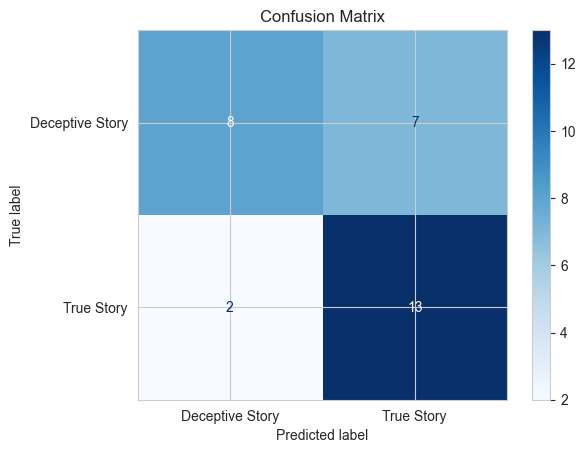

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')  # Optional: change the color map
plt.title("Confusion Matrix")
plt.show()


可以看出，在分类错误的样本中，大多数是将“欺骗性”（deceptive）故事误判为“真实”（true）。这种错误的分类倾向可能源于多个因素，包括模型对微小差异的敏感度不足以及数据中潜在的噪声。  
值得注意的是，这种误判的后果相对较小，因为在大多数实际应用场景中（例如庭审、欺诈检测等），将真话误判为谎言的后果通常更加严重。在这些情境中，错误地将诚实的陈述判定为虚假的可能导致冤屈、错误定罪或损害无辜者的权益。因此，即使模型在某些情况下无法完美区分所有欺骗性故事，保证不漏判真实陈述仍然是更为优先的目标。  
因此，模型的设计应优先考虑如何最大程度减少将“真实”错误判定为“虚假”的情况，即使牺牲一定的准确率来减少漏判。

## 对于其它分类器的尝试

本文未将集成方法（ensemble stage）纳入到整体 pipeline 的原因之一是，其他分类器在实验中的表现并不理想，要么准确率较低，要么存在严重的过拟合现象。尽管如此，为了展示不同分类器的多样性及其表现，本文将提供一些其他常用分类器的代码，并呈现它们在本数据集上的实验结果。    
通过对比多种分类器的性能，可以更全面地理解不同算法的优缺点。例如，一些分类器可能在处理复杂特征时表现更好，但由于模型过于复杂，容易在小样本数据集上产生过拟合。而另一些较简单的分类器则可能由于模型能力有限，导致准确率较低。尽管如此，这些尝试有助于为最终选择最合适的分类器提供依据，并为集成方法的引入奠定基础。  
接下来的部分将展示几种常见分类器的实现代码，并评估它们在本项目中的具体表现。

### 贝叶斯

该参数值表明，使用了一个极小的平滑因子 `var_smoothing`，其目的是避免零方差情况下模型出现计算问题。`1e-11` 是一个非常小的值，通常用于确保数值计算的稳定性。这表明，模型对该特征的选择非常敏感，需要对数据中的噪声进行适当的平滑，以避免计算中的不稳定。  
准确率等于 50% 说明模型的预测接近随机猜测，表明可能存在**过拟合**的问题。在这种情况下，训练集的准确率明显高于测试集，表明模型在训练数据上过度优化，而没有较好地泛化到测试集上。

In [52]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Set up hyperparameter grid for GridSearchCV
param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, ]  # Example parameter for GaussianNB
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=8, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_nb_classifier = grid_search.best_estimator_

# Make predictions
train_predictions = best_nb_classifier.predict(X_train)
test_predictions = best_nb_classifier.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)

Best Parameters: {'var_smoothing': 1e-11}
Training Accuracy: 0.6714285714285714
Test Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        15
           1       0.50      0.33      0.40        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.49        30



### 决策树

可以看到，在增加交叉验证、调整网格搜索的参数区间以限制模型复杂度的情况下，训练准确率高（85.71%），但测试准确率低（53.33%），这强烈表明模型存在过拟合。决策树在训练数据上拟合得很好，但无法泛化到测试集，表明模型在训练集上的学习过程过于依赖于数据中的噪声或细节，导致其在新样本上的表现较差。  
由于随机森林与支持向量机的结果相似，笔者决定不再展示随机森林的代码，因为两者的原理具有较高的相似性。

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Set up hyperparameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini'],
    'splitter': ['best'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [None, 'sqrt', 'log2']  # Regularization through feature consideration
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=20, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model
best_dt_classifier = grid_search.best_estimator_

# Make predictions
train_predictions = best_dt_classifier.predict(X_train)
test_predictions = best_dt_classifier.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 25, 'splitter': 'best'}
Training Accuracy: 0.8571428571428571
Test Accuracy: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.55      0.40      0.46        15
           1       0.53      0.67      0.59        15

    accuracy                           0.53        30
   macro avg       0.54      0.53      0.52        30
weighted avg       0.54      0.53      0.52        30



### KNN

训练集和测试集之间存在明显的准确度差异，尤其是模型在训练集上的表现要好得多。考虑到 KNN 是一个基于局部邻居的模型，过拟合的现象可能是由于选择的 n_neighbors 值过小（3），使得模型对训练数据的噪声和局部特征敏感，从而导致测试集表现差。

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Set up hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=8, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_knn_classifier = grid_search.best_estimator_

# Make predictions
train_predictions = best_knn_classifier.predict(X_train)
test_predictions = best_knn_classifier.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)

Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Accuracy: 0.6857142857142857
Test Accuracy: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        15
           1       0.53      0.60      0.56        15

    accuracy                           0.53        30
   macro avg       0.53      0.53      0.53        30
weighted avg       0.53      0.53      0.53        30



### 逻辑回归

由于测试集和训练集的准确度差异较小，且整体准确度较低，可以推测模型在训练过程中未能充分捕捉到数据的潜在模式。这表明可能存在 欠拟合，即模型过于简单或正则化过强，从而无法适应数据的复杂性。特别是较小的 C 值（0.1）可能导致模型正则化过强，限制了其在训练集上的表现。

In [55]:
from sklearn.linear_model import LogisticRegression

# Define parameter grid for GridSearchCV (simplified for Logistic Regression)
param_grid = {
    'C': [0.1, 0.5, 1, 5],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solvers that are good for smaller datasets
    'max_iter': [40, 50, 100, 200]  # Number of iterations for convergence
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=8, scoring='f1', n_jobs=-1, refit=True)
grid_search.fit(X_train, y_train)

best_log_reg_classifier = grid_search.best_estimator_

train_predictions = best_log_reg_classifier.predict(X_train)
test_predictions = best_log_reg_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(report)

Best Parameters: {'C': 0.1, 'max_iter': 40, 'solver': 'lbfgs'}
Training Accuracy: 0.7
Test Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.50      0.40      0.44        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.49        30



通过前述代码的展示，可以充分证明在本方案中未采用集成学习方法的合理性，具体理由如下：  
1. 支持向量机（SVM）在小样本分类任务中表现优于其他模型；  
2. 若采用集成学习中的投票机制，其他模型的误判可能会干扰SVM的决策；若将各个模型的输出按权重合并，SVM作为强分类器的权重必然占据主导地位，从而使其他分类器的影响微乎其微；  
3. 其他模型在小样本情况下容易出现过拟合现象。

# 7 Conclusions

在模型调优方面，本文调整的超参数较为有限，未来可以考虑扩展调整的超参数范围，以进一步优化模型性能。

本文仅构建了单一模型，然而，鉴于中文和英文在语言结构上的差异，未来可以探讨针对单一语言训练模型，是否能在该语言的欺骗检测中实现更高的准确率。

此外，未来可将音频信号转化为文本，通过文本分析识别其中可能的欺骗行为（例如明显的逻辑漏洞），并将文本判定结果与音频信号判定结果相结合，做出更为综合的判断。

如果能够获取更少噪声、更大规模的文本数据，神经网络有望进一步优化模型性能。若数据难以获得，也可以考虑研究少样本学习（Few-Shot Learning）方法，以提高在小样本分类任务中的表现。

所有相关代码已上传至[Github仓库](https://github.com/Lingjunnn/DeceptionDetection)，供进一步参考与使用。

# 8 References


1. **GitHub - CBU5201Datasets/Deception: CBU5201 Deception Dataset**, GitHub, 2024. Available at: [https://github.com/CBU5201Datasets/Deception](https://github.com/CBU5201Datasets/Deception) (accessed Dec. 20, 2024).  

2. Shanjita Akter Prome, Neethiahnanthan Ari Ragavan, Md Rafiqul Islam, D. Asirvatham, and Anasuya Jegathevi Jegathesan, **"Deception detection using ML and DL techniques: A systematic review,"** *Natural Language Processing Journal*, vol. 6, pp. 100057–100057, Jan. 2024. doi: [https://doi.org/10.1016/j.nlp.2024.100057](https://doi.org/10.1016/j.nlp.2024.100057).  

3. T. Bruno, C. Yee, A. Bhatnagar, and L. Arevalo, **"GitHub - DetectingHumanEmotion/detecting-human-emotion-webapp: Deception and emotion detection via audio and video."** GitHub, 2018. Available at: [https://github.com/DetectingHumanEmotion/detecting-human-emotion-webapp](https://github.com/DetectingHumanEmotion/detecting-human-emotion-webapp) (accessed Dec. 20, 2024).  

4. T. Giannakopoulos, **"A Python library for audio feature extraction, classification, segmentation and applications,"** GitHub, May 19, 2022. Available at: [https://github.com/tyiannak/pyAudioAnalysis](https://github.com/tyiannak/pyAudioAnalysis).  

5. Alex Sebastião Constâncio, Denise Fukumi Tsunoda, Helena, J. Martins, and Deborah Ribeiro Carvalho, **"Deception detection with machine learning: A systematic review and statistical analysis,"** *PLOS ONE*, vol. 18, no. 2, pp. e0281323–e0281323, Feb. 2023. doi: [https://doi.org/10.1371/journal.pone.0281323](https://doi.org/10.1371/journal.pone.0281323).  

6. **AIS Electronic Library (AISeL) - Hawaii International Conference on System Sciences 2021 (HICSS-54): Deception Detection Using Machine Learning**, Aisnet.org, 2021. Available at: [https://aisel.aisnet.org/hicss-54/st/cyber_threat_intelligence/3/](https://aisel.aisnet.org/hicss-54/st/cyber_threat_intelligence/3/) (accessed Dec. 25, 2024).  

7. S. V. Fernandes and M. S. Ullah, **"Use of Machine Learning for Deception Detection From Spectral and Cepstral Features of Speech Signals,"** *IEEE Access*, vol. 9, pp. 78925–78935, 2021. doi: [https://doi.org/10.1109/access.2021.3084200](https://doi.org/10.1109/access.2021.3084200).  